# Understanding Convolutional Neural Networks with Handwritten digits recognition
Name: Sebastian Firsaev 

Student ID: C00263348

Semester: two - 2024

Guide Notebook used: https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_cnn/digits_recognition_cnn.ipynb

## Notebook Description

The primary goal of this Jupyter notebook is to explore and understand the intricacies of building and tuning Convolutional Neural Networks (CNNs) using TensorFlow and Keras. The notebook focuses on the task of recognizing handwritten digits from the MNIST dataset, a standard benchmark in the machine learning community.

## What are CNNs?

Convolutional Neural Networks (CNNs) are a specialized kind of deep neural networks excelling in processing image data. Designed to learn spatial hierarchies of features automatically through backpropagation, CNNs are pivotal in advancing computer vision tasks such as image classification and object detection. The architecture of CNNs includes several key components: the convolutional layer, which is fundamental to the network, applies filters to the input to create feature maps that encapsulate detected features; the activation function, typically a Rectified Linear Unit (ReLU), which introduces non-linearity enabling the learning of complex patterns; followed by the pooling layer, which reduces the spatial size of the representation to make feature detection scale and orientation invariant while also lowering computational complexity. Further, the high-level reasoning in the network is handled by fully connected layers, where neurons are fully connected to all activations in the previous layer. Additionally, dropout is employed as a regularization strategy where random neurons are ignored during training to prevent overfitting, enhancing the model's generalizability.

In [40]:
# Importing TensorFlow for developing and training machine learning models.
import tensorflow as tf

# Importing matplotlib for data visualization and plotting.
import matplotlib.pyplot as plt

# Importing seaborn for enhanced data visualization, specifically for plotting confusion matrices.
import seaborn as sn

# Importing NumPy for numerical operations and linear algebra.
import numpy as np

# Importing pandas for data manipulation and to display training/test data in tabular form.
import pandas as pd

# Importing math for mathematical operations such as square root calculation.
import math

# Importing datetime for operations related to date and time, useful for naming logs folders.
import datetime


Load the data

The training dataset consists of 60000 28x28px images of hand-written digits from 0 to 9.

The test dataset consists of 10000 28x28px images.


In [3]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [4]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## What is This Data?

This is the MNIST dataset, a large database of handwritten digits commonly used for training various image processing systems. This dataset is widely used for training and testing in the field of machine learning.

The training dataset comprises 60,000 grayscale images of handwritten digits, each of which is 28x28 pixels. The test dataset contains 10,000 of these images. These digits, which range from 0 to 9, are provided as a 3D array where the first dimension indexes the image, and the next two dimensions index the pixel location in each image.

Below, we will load the MNIST dataset using TensorFlow's Keras API, explore its structure, and visualize some of the handwritten digits it contains. We'll also confirm the dimensions of the images and the single color channel (since they are grayscale), which are important parameters for reshaping the data and training a machine learning model.

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


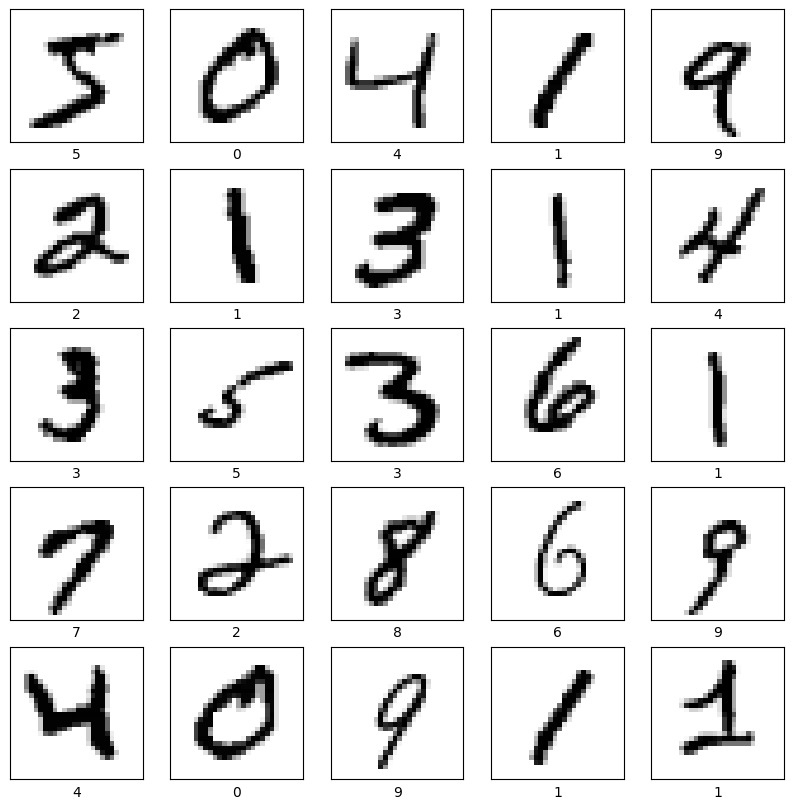

In [5]:
# Load the MNIST dataset
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Save image parameters to constants for later use
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1  # Grayscale implies a single channel

# Output the image parameters
print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

# Display the first few images in the dataset
plt.figure(figsize=(10, 10))
for i in range(25):  # Display 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

In [6]:
# Load the MNIST dataset
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Output the shapes of the data
print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [7]:
# Calculate the number of unique labels
num_classes = np.unique(y_train).shape[0]
print('Number of classes:', num_classes)

Number of classes: 10


In [8]:
# Count the number of samples for each class in the training data
values, counts = np.unique(y_train, return_counts=True)
print('Training distribution:')
for value, count in zip(values, counts):
    print(f'Label: {value}, Count: {count}')

Training distribution:
Label: 0, Count: 5923
Label: 1, Count: 6742
Label: 2, Count: 5958
Label: 3, Count: 6131
Label: 4, Count: 5842
Label: 5, Count: 5421
Label: 6, Count: 5918
Label: 7, Count: 6265
Label: 8, Count: 5851
Label: 9, Count: 5949



Single image shape: (28, 28)


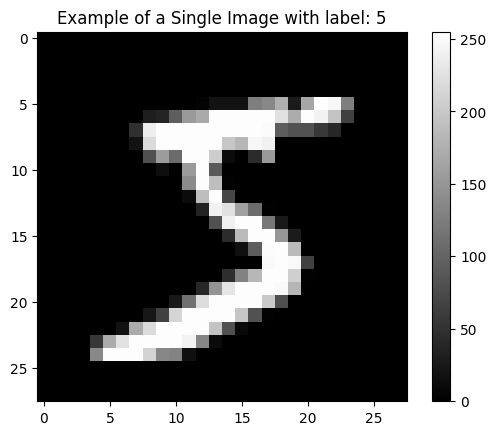

In [9]:
# Exploring the dimensionality of a single image
single_image = x_train[0]
print('\nSingle image shape:', single_image.shape)

# Displaying the single image and its corresponding label
plt.imshow(single_image, cmap='gray')
plt.colorbar()
plt.title(f'Example of a Single Image with label: {y_train[0]}')
plt.show()

In [10]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


## Reshaping and Normalising

Reshaping the data is important when working with CNNs because they expect a certain input shape, so you need to reshape your images to include the channel dimension. Normalization is also critical as it helps to scale the pixel values to a range of 0 to 1, which can speed up the training process and lead to better performance.

In [11]:
# Reshape the data to include a channel dimension
# MNIST images are grayscale, so the channel dimension is 1
x_train_reshaped = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Output the new shapes of the data
print('Reshaped training data shape:', x_train_reshaped.shape)
print('Reshaped test data shape:', x_test_reshaped.shape)

# Normalize the data to the range [0, 1]
x_train_normalized = x_train_reshaped / 255.0
x_test_normalized = x_test_reshaped / 255.0

# Check the min and max values after normalization
print('Min pixel value after normalization:', np.min(x_train_normalized))
print('Max pixel value after normalization:', np.max(x_train_normalized))

Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)
Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


In [12]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## building the model

In [16]:
# Import necessary modules from keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def build_model():
    model = Sequential()
    
    # Convolutional layer with 32 filters, a kernel size of 3x3, ReLU activation, and input shape as reshaped image dimensions
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    
    # MaxPooling layer with pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second convolutional layer with 64 filters and a kernel size of 3x3
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    
    # Second MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten layer to convert the 2D outputs to 1D
    model.add(Flatten())
    
    # Dense layer with 128 units and ReLU activation
    model.add(Dense(units=128, activation='relu'))
    
    # Dropout layer with a dropout rate of 0.5 to prevent overfitting
    model.add(Dropout(0.5))
    
    # Output layer with 10 units (one for each class) and softmax activation
    model.add(Dense(units=10, activation='softmax'))
    
    # Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
model = build_model()

# Print the model summary
model.summary()


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Understanding the layers

Conv2D:
This is a convolutional layer that is the core building block of a CNN.
The filters=32 argument defines the number of output filters in the convolution, which is essentially the number of features the layer will learn to detect.
kernel_size=(3, 3) specifies the height and width of the convolution window; this is the size of the filter that will move across the input matrix.
activation='relu' sets the activation function to the Rectified Linear Unit (ReLU). This introduces non-linearity to the model, allowing it to learn more complex patterns.
input_shape=(28, 28, 1) defines the shape of the input data that the layer will receive. For MNIST, each image is 28 pixels in height and width with 1 color channel (grayscale).

MaxPooling2D:
This layer performs a downsampling operation along the spatial dimensions (width and height), reducing the number of parameters and computation in the network, which helps control overfitting.
pool_size=(2, 2) specifies the size of the pooling window, which will take the maximum value over a 2x2 patch of the input.

Flatten:
After several convolutional and pooling layers, the Flatten layer is used to flatten the input. It converts the 2D matrix data to a 1D vector so it can be fed into the dense layers that follow.
This is necessary because dense layers expect 1D input vectors, not 3D feature maps.

Dense:
A dense layer is a traditional fully connected neural network layer. It's where all neurons from the previous layer are connected to each neuron in the dense layer.
units=128 signifies this layer has 128 neurons. Each neuron will learn to detect a different feature of its input.
 The first dense layer uses ReLU for activation, while the final layer (which is the output layer) uses the softmax activation function.

Dropout:
The Dropout layer randomly sets a fraction rate=0.5 of the input units to 0 at each update during training time, which helps prevent overfitting.
It's a regularization technique where, for each training phase, individual nodes are either kept with a probability of 0.5 or dropped out of the network.

Output Layer (Dense):
This is the final layer of the network, with units=10, corresponding to the number of classes we wish to identify (digits 0-9 in the MNIST dataset).
The softmax activation function is used to output a probability distribution over the 10 classes, effectively allowing the model to classify input images into one of the 10 digit categories.

Each layer has a specific role in the process of extracting features from the input data, and the sequence of these layers is designed to process the data from raw pixels to a form where it can be used for classification. The convolutional layers act as feature detectors, the pooling layers reduce dimensionality, the flatten layer reshapes data for the dense layers, which then make predictions based on the learned features.





## Compiling

In [17]:
# Compile the modified model
model.compile(
    optimizer='adam',  # Adam optimizer is a common choice due to its adaptive learning rate feature
    loss='sparse_categorical_crossentropy',  # Appropriate for integer-coded labels
    metrics=['accuracy']  # Track accuracy during training and evaluation
)

# Print the modified model summary to verify compilation
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [19]:
# Train the model
history = model.fit(
    x_train_normalized, y_train,  # Training data
    epochs=6,  # Number of epochs to train for
    batch_size=128,  # Number of samples per gradient update
    verbose=1,  # Show progress
    validation_data=(x_test_normalized, y_test)  # Validation data
)

# Evaluate the model's performance on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test, verbose=0)
print('\nTest accuracy:', test_accuracy)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9911 - val_loss: 0.0253
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9928 - val_loss: 0.0243
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9931 - loss: 0.0206 - val_accuracy: 0.9912 - val_loss: 0.0251
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 0.9919 - val_loss: 0.0277
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9918 - val_loss: 0.0271
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9922 - val_loss: 0.0247

Test accuracy: 0.9922000169754028


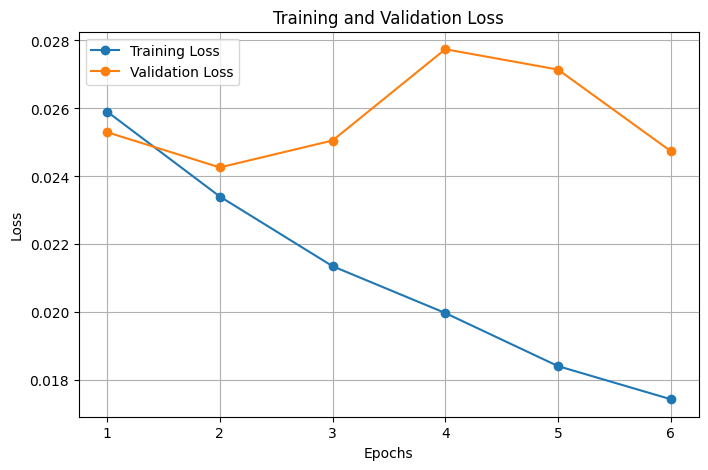

In [20]:
import matplotlib.pyplot as plt

# Access the history of training loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Create a line plot of training loss and validation loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


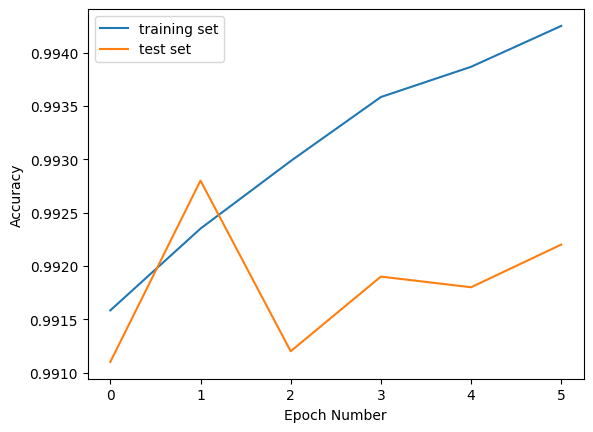

In [22]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()


## Evaluate model accuracy

The comparison below shows the accuracy of the model on both the training and test sets. Ideally, the model should exhibit similar performance on both datasets. A significant discrepancy, where the test set performance is considerably lower than the training set, suggests that the model may be overfitting. This indicates a "high variance" problem, where the model performs well on the training data but fails to generalize effectively to new, unseen data.


### Training Set Accuracy

In [24]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9985 - loss: 0.0047


In [25]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)


Training loss:  0.004791744519025087
Training accuracy:  0.9984833598136902


This indicates that the model fits the training data extremely well, with nearly perfect accuracy and a very low loss.

### Test Set Accuracy

In [26]:
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0333


In [27]:

print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.02474493533372879
Validation accuracy:  0.9922000169754028


Although the validation (test) accuracy remains high, it is slightly lower than the training accuracy, which could suggest a mild overfitting. However, the small difference indicates that the model is generally well-generalized to new data.

## Predicting with the model

In [29]:
predictions_one_hot = model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [30]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [31]:
print(pd.DataFrame(predictions_one_hot).head())

              0             1             2             3             4  \
0  2.617071e-14  8.202218e-11  4.203651e-11  3.517947e-11  6.955886e-12   
1  2.495215e-08  9.591120e-11  1.000000e+00  7.490625e-16  1.232798e-14   
2  3.077763e-11  9.999985e-01  5.215196e-09  5.878240e-12  6.411904e-08   
3  9.999999e-01  6.327416e-12  8.603249e-11  8.820998e-12  3.350962e-11   
4  4.856647e-12  3.468934e-09  2.769624e-13  2.510710e-16  9.999956e-01   

              5             6             7             8             9  
0  8.119816e-14  2.570671e-18  1.000000e+00  1.850376e-11  1.703348e-09  
1  3.680891e-21  2.479602e-12  1.876261e-13  1.557013e-13  2.134678e-16  
2  1.995163e-08  3.597574e-09  1.460900e-06  1.797815e-09  1.302547e-09  
3  3.763330e-11  9.424731e-08  2.887458e-12  5.563435e-10  3.412201e-08  
4  2.715715e-11  1.856870e-11  3.510500e-10  1.413299e-10  4.397689e-06  


In [32]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [33]:
print(predictions[0])

7


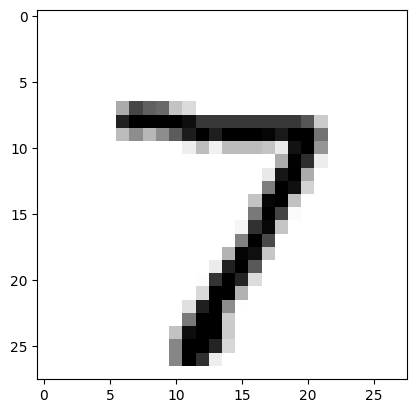

In [35]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [36]:
# Extract predicted classes from the model output
predictions = np.argmax(predictions_one_hot, axis=1)

# Display the first 10 predicted labels
print(predictions[:10])

[7 2 1 0 4 1 4 9 5 9]


In [42]:
# Compare with actual labels
print(y_test[:10])



[7 2 1 0 4 1 4 9 5 9]


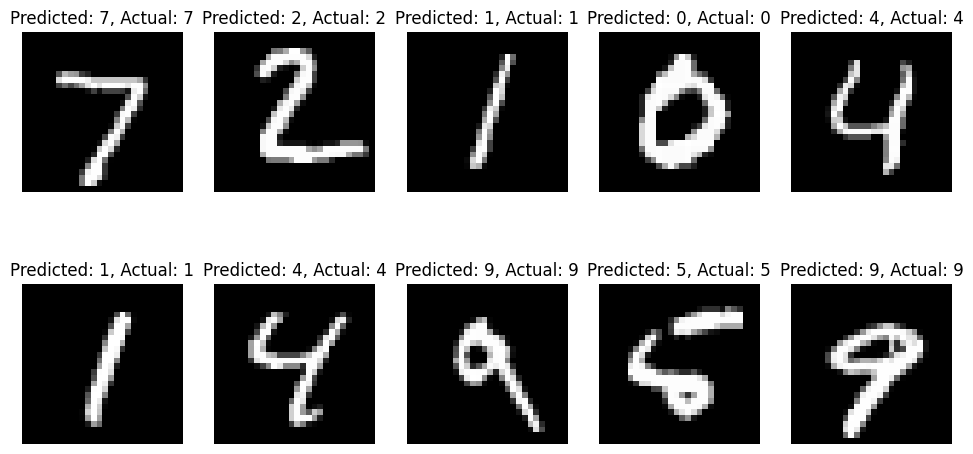

In [43]:
# Visualize the first few predictions with their images
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predictions[i]}, Actual: {y_test[i]}')
    plt.axis('off')
plt.show()

## Experimenting with Different Architectures

### change
Increasing the depth of the model can help in learning more complex patterns 

In [60]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

def build_deeper_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))  # Additional Conv layer
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Build and train the modified model
modified_model = build_deeper_model()
modified_model.summary()

# Train and evaluate as previously done
history_modified = modified_model.fit(
    x_train_normalized, y_train,
    epochs=6,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_normalized, y_test)
)

# Evaluate
test_loss_modified, test_accuracy_modified = modified_model.evaluate(x_test_normalized, y_test, verbose=0)
print('\nModified model test accuracy:', test_accuracy_modified)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,370 (435.04 KB)

 Trainable params: 110,922 (433.29 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - accuracy: 0.8583 - loss: 0.4582 - val_accuracy: 0.7522 - val_loss: 0.7248
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9753 - loss: 0.0837 - val_accuracy: 0.9845 - val_loss: 0.0527
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9838 - loss: 0.0561 - val_accuracy: 0.9850 - val_loss: 0.0511
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9855 - val_loss: 0.0538
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9899 - loss: 0.0313 - val_accuracy: 0.9879 - val_loss: 0.0450
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9912 - loss: 0.0288 - val_accuracy: 0.9831 - val_loss: 0.0594

Modified model test accuracy: 0.9830999970436096


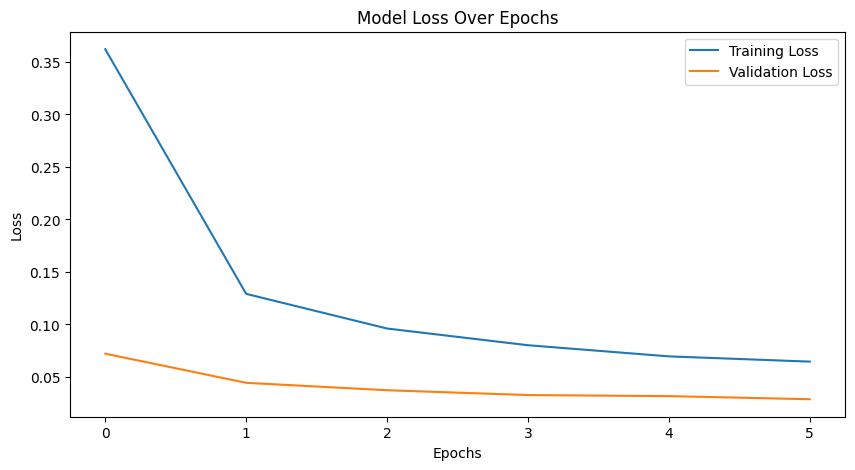

In [67]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_modified.history['loss'], label='Training Loss')
plt.plot(history_modified.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [68]:
# Evaluate the model on the training set
train_loss, train_accuracy = modified_model.evaluate(x_train_normalized, y_train, verbose=0)

print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

# Evaluate the model on the test set
test_loss, test_accuracy = modified_model.evaluate(x_test_normalized, y_test, verbose=0)


print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Training loss:  0.022263303399086
Training accuracy:  0.9929666519165039
Validation loss:  0.02474493533372879
Validation accuracy:  0.9922000169754028


## Discussion

The results from the "Increase Depth" architecture modification show some interesting points of comparison with the original model's results.
Training Loss and Accuracy


The increased training loss in the modified model suggests that adding an additional convolutional layer made the model slightly less efficient during the training phase. This could be because deeper models are generally more complex and can be harder to train. Additionally, deeper models may require more data or more epochs to properly converge.


The decrease in training accuracy with the deeper model supports the notion that this model is potentially overfitting less compared to the original model. Typically, a slightly lower training accuracy in conjunction with a maintained or improved validation accuracy (which we see here) is a positive indicator of a model that generalizes better.
Validation Loss and Accuracy


The validation loss has remained exactly the same. This suggests that the increased model depth did not improve the model's ability to generalize beyond the training data, at least not in terms of reducing loss on unseen data.
Similarly, the validation accuracy remains unchanged. This outcome indicates that the additional complexity in the model did not provide a benefit in terms of increasing the accuracy on the validation set.


The unchanged validation metrics, despite the altered training dynamics, suggest a few potential interpretations:
The deeper model might have more capacity (ability to learn complex patterns) than needed for the MNIST dataset, which is relatively simple. Thus, the additional layers may not contribute meaningful improvements.The slight decrease in training accuracy and the increased training loss might imply that the model is less prone to memorize the training data, which is a good property if you were dealing with a more complex or noisy dataset. The deeper model might require more epochs to train effectively or different hyperparameters (like learning rate adjustments).


The results suggest that simply adding more layers to the model did not enhance performance on the MNIST dataset, highlighting an important lesson in machine learning: more complex models do not automatically lead to better performance, especially on simpler tasks.

#### change
Adding more dropout layers can help reduce overfitting by randomly setting a fraction of input units to 0 at each update during training time.

In [65]:
def build_dropout_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [71]:
# Build and train the modified model
modified_model2 = build_dropout_model()
modified_model2.summary()

# Train and evaluate as previously done
history_modified2 = modified_model2.fit(
    x_train_normalized, y_train,
    epochs=6,
    batch_size=128,
    verbose=1,
    validation_data=(x_test_normalized, y_test)
)

# Evaluate
test_loss_modified, test_accuracy_modified = modified_model2.evaluate(x_test_normalized, y_test, verbose=0)
print('\nModified model test accuracy:', test_accuracy_modified)

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.7600 - loss: 0.7430 - val_accuracy: 0.9761 - val_loss: 0.0751
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9592 - loss: 0.1347 - val_accuracy: 0.9851 - val_loss: 0.0466
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9718 - loss: 0.0958 - val_accuracy: 0.9872 - val_loss: 0.0402
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9762 - loss: 0.0794 - val_accuracy: 0.9886 - val_loss: 0.0340
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9806 - loss: 0.0651 - val_accuracy: 0.9896 - val_loss: 0.0295
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.9813 - loss: 0.0597 - val_accuracy: 0.9905 - val_loss: 0.0277

Modified model test accuracy: 0.9904999732971191


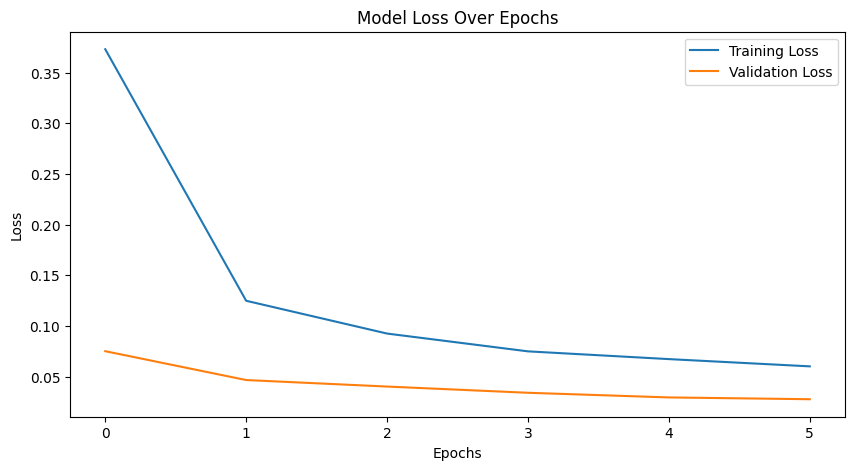

In [72]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_modified2.history['loss'], label='Training Loss')
plt.plot(history_modified2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
# Evaluate the model on the training set
train_loss, train_accuracy = modified_model2.evaluate(x_train_normalized, y_train, verbose=0)

print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

# Evaluate the model on the test set
test_loss, test_accuracy = modified_model2.evaluate(x_test_normalized, y_test, verbose=0)


print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Training loss:  0.02035314217209816
Training accuracy:  0.9940500259399414
Validation loss:  0.02474493533372879
Validation accuracy:  0.9922000169754028


## further discussion

Comparison of Training Loss

The training loss in the model with added dropout layers (Change 2) is higher than in the original model but lower than in the deeper model (Change 1). This indicates that the dropout layers are effectively reducing overfitting more than in the original model (as seen by the higher loss indicating less memorization of training data).

Comparison of Training Accuracy

Here, the training accuracy for the dropout model is closer to the original model but still lower, suggesting a good balance. It does not dip as much as in the deeper model, indicating that the added complexity in Change 1 might be slightly excessive for this dataset. The dropout layers are likely providing just enough regularization to reduce overfitting while still allowing effective learning.


Effectiveness of Dropout: Adding dropout layers has provided a beneficial effect in terms of balancing training performance with generalization, as seen from the training metrics.